### Imports

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import copy

# Exercise 1

In [4]:
inp_img = cv2.imread("./hw2_data/mandrill.png")
image = inp_img[:,:,::-1]

output = [(image, "Original Image")]

output.append((cv2.GaussianBlur(image,(7,7),3), "Gaussian 7x7"))
output.append((cv2.GaussianBlur(image,(21,21),10), "Gaussian 21x21"))
output.append((cv2.blur(image, (21, 21)), "Uniform Blur"))

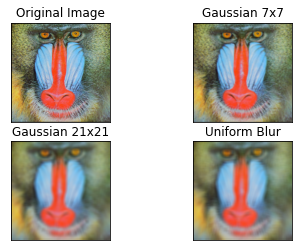

In [5]:
for i in range(len(output)):
    plt.subplot(2, 2, i+1)
    plt.imshow(output[i][0], interpolation=None), plt.title(output[i][1]), plt.xticks([]), plt.yticks([])

plt.show()

# Exercise 2

In [6]:
M = 12
N = 16

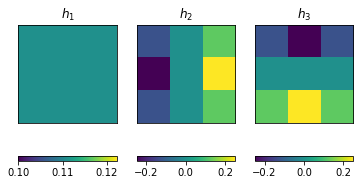

In [7]:
hs = []

hs.append(((1.0/9.0)*np.ones((3,3)), "$h_1$"))
hs.append(((1.0/8.0)*np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]), "$h_2$"))
hs.append((np.transpose(hs[1][0]), "$h_3$"))

fig = plt.figure()
for i in range(len(hs)):
    a = fig.add_subplot(1, 3, i+1)
    implot = plt.imshow(hs[i][0], interpolation=None)
    a.set_title(hs[i][1])
    plt.xticks([]), plt.yticks([])
    plt.colorbar(orientation='horizontal')
    
plt.show()

In [8]:
def create_H(h):
    H = np.zeros((M*N, M*N))
    for i in range(M*N):
        for k in [-1, 0, 1]:
            for l in [-1, 0, 1]:
                j = i-N*k-l
                if 0 <= j < M*N:
                    H[i,j] = h[k+1,l+1]
    return H

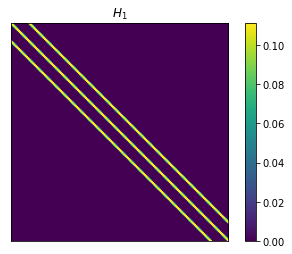

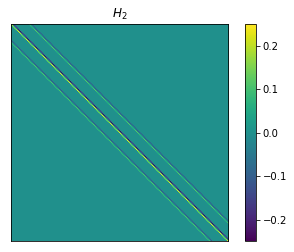

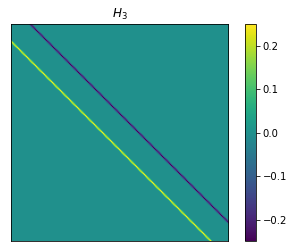

In [65]:
H1 = create_H(hs[0][0])
H2 = create_H(hs[1][0])
H3 = create_H(hs[2][0])

Hs = []

Hs.append((H1,"$H_1$"))
Hs.append((H2,"$H_2$"))
Hs.append((H3,"$H_3$"))

for i in range(len(hs)):
    fig, a = plt.subplots()
    implot = plt.imshow(Hs[i][0], interpolation=None)
    a.set_title(Hs[i][1])
    a.set_xticks([]), a.set_yticks([])
    plt.colorbar()
    plt.show()

### Some More Imports

In [13]:
import copy
import scipy.io as sio

# Exercise 3

In [11]:
mdict = sio.loadmat("./hw2_data/are_these_separable_filters.mat")
K1 = mdict["K1"]
K2 = mdict["K2"]
K3 = mdict["K3"]

def zeroSmallNumbers(arr):
    newarr = []
    count = 0
    for item in arr:
        if np.abs(item) < 0.000000000001:
            newarr.append(0)
        else:
            newarr.append(item)
            count += 1
    return newarr, count


U1, s1, V1 = np.linalg.svd(K1, full_matrices=True)
U2, s2, V2 = np.linalg.svd(K2, full_matrices=True)
U3, s3, V3 = np.linalg.svd(K3, full_matrices=True)

singular1, count1 = zeroSmallNumbers(s1)
singular2, count2 = zeroSmallNumbers(s2)
singular3, count3 = zeroSmallNumbers(s3)

print("Singular Values for K1:\n" + str(np.diag(singular1)))
print("Kernel is separable\n" if count1 == 1 else "Kernel is not separable\n")
print("Singular Values for K2:\n" + str(np.diag(singular2)))
print("Kernel is separable\n" if count2 == 1 else "Kernel is not separable\n")
print("Singular Values for K3:\n" + str(np.diag(singular3)))
print("Kernel is separable\n" if count3 == 1 else "Kernel is not separable\n")

Singular Values for K1:
[[1.15572864 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Kernel is separable

Singular Values for K2:
[[2.39244588 0.         0.         0.         0.        ]
 [0.         0.98749722 0.         0.         0.        ]
 [0.         0.         0.67563127 0.         0.        ]
 [0.         0.         0.         0.13996899 0.        ]
 [0.         0.         0.         0.         0.07304454]]
Kernel is not separable

Singular Values for K3:
[[3.6587224  0.         0.         0.         0.        ]
 [0.         0.29429662 0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Kernel is

# Exercise 4

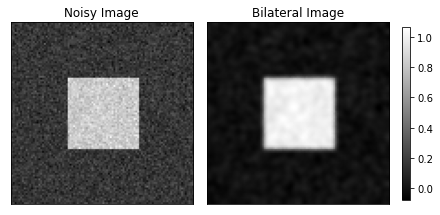

In [34]:
mdict = sio.loadmat("./hw2_data/bilateral.mat")
image = mdict["img_noisy"]

bilateral = cv2.bilateralFilter(image, 7, 1.5, 1.5)

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)

ax1.imshow(image, cmap="gray", interpolation=None)
ax1.set_title("Noisy Image")
ax1.set_xticks([]), ax1.set_yticks([])

pcm = ax2.imshow(bilateral, cmap="gray", interpolation=None)
ax2.set_title("Bilateral Image")
ax2.set_xticks([]), ax2.set_yticks([])
    
# ax = plt.gca()
fig.colorbar(pcm, ax=[ax1, ax2], location='right', shrink=0.6)
plt.show()

# Exercise 5

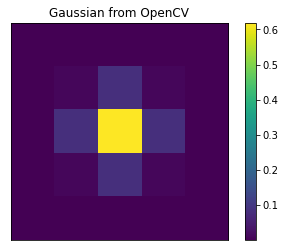

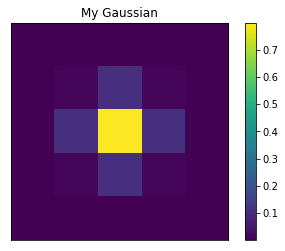

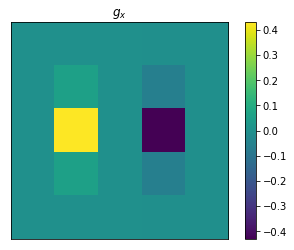

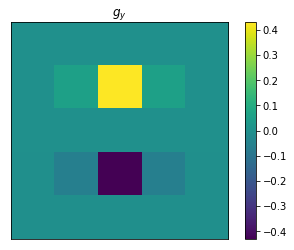

In [121]:
def print_img(img, title):
    plt.imshow(img, interpolation=None)
    plt.colorbar()
    plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()

ksize = 5
sigma = 0.5

g = cv2.getGaussianKernel(ksize, sigma)
gg = g.dot(g.T)

outputs = [(gg, "Gaussian from OpenCV")]

my_gg = np.zeros((ksize,ksize))
for i, row in enumerate(my_gg):
    for j, val in enumerate(row):
        y = i - (ksize-1)/2
        x = j - (ksize-1)/2
        my_gg[i,j] = (1.0/(np.sqrt(2*np.pi*sigma**2)))*np.exp(-0.5*((x**2+y**2)/(sigma**2)))
outputs.append((my_gg, "My Gaussian"))

deriv_x = np.zeros((ksize,ksize))
for i, row in enumerate(deriv_x):
    for j, val in enumerate(row):
        y = i - (ksize-1)/2
        x = j - (ksize-1)/2
        deriv_x[i,j] = (-x/(sigma**2))*my_gg[i,j]
outputs.append((deriv_x, "$g_x$"))

deriv_y = np.zeros((ksize,ksize))
for i, row in enumerate(deriv_y):
    for j, val in enumerate(row):
        y = i - (ksize-1)/2
        x = j - (ksize-1)/2
        deriv_y[i,j] = (-y/(sigma**2))*my_gg[i,j]
outputs.append((deriv_y, "$g_y$"))

for out in outputs:
    print_img(out[0], out[1])

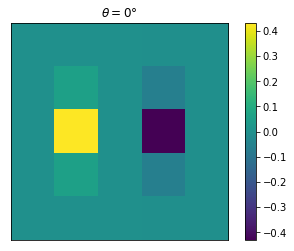

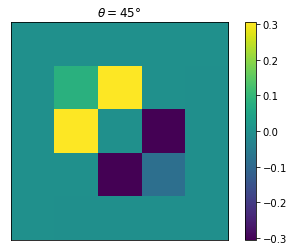

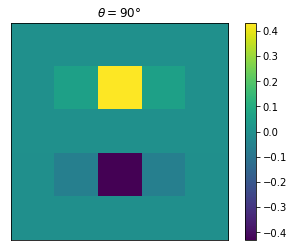

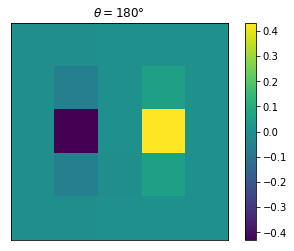

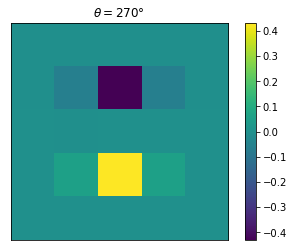

In [122]:
def create_theta_filter(theta):
    deriv_theta = np.zeros((ksize,ksize))
    for i, row in enumerate(deriv_theta):
        for j, val in enumerate(row):
            y = i - (ksize-1)/2
            x = j - (ksize-1)/2
            deriv_theta[i,j] = np.cos(theta)*deriv_x[i,j] + np.sin(theta)*deriv_y[i,j]
    return deriv_theta


angles = [0, 45, 90, 180, 270]
theta_filters = []

for theta in angles:
    deriv_theta = create_theta_filter(theta*((np.pi)/(180)))
    theta_filters.append((theta, deriv_theta))
    print_img(deriv_theta, "$\\theta = " + str(theta) + "\degree$")

In [116]:
from scipy import ndimage as nd

def print_img_gray(img, title):
    plt.imshow(img, cmap="gray", interpolation=None)
    plt.colorbar()
    plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()

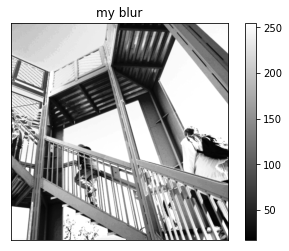

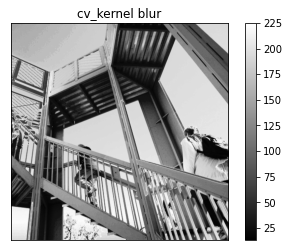

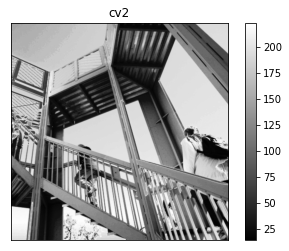

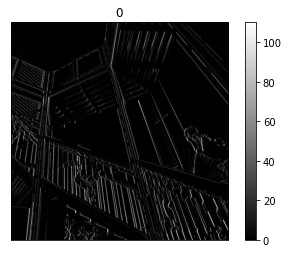

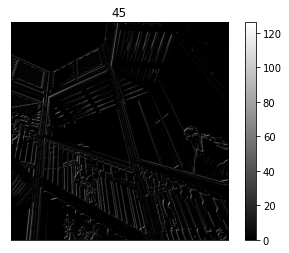

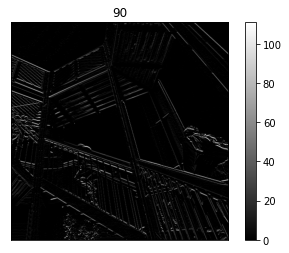

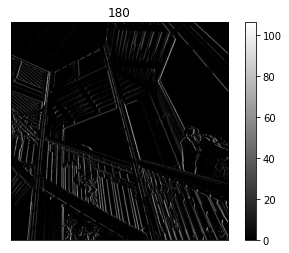

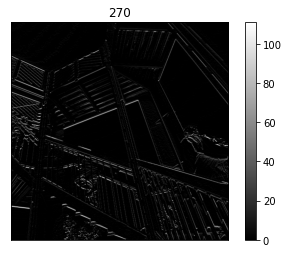

In [131]:
img = cv2.imread("./hw2_data/ascent.jpg", 0)

print_img_gray(cv2.filter2D(img, -1, my_gg), "my blur")
cv_kernel = cv2.getGaussianKernel(5, 0.5)
print_img_gray(cv2.filter2D(img, -1, cv_kernel), "cv_kernel blur")

print_img_gray(cv2.GaussianBlur(img, (5,5), 0.5), "cv2")

for theta_filter in theta_filters:
    res = cv2.filter2D(img, -1, theta_filter[1])
    print_img_gray(res, theta_filter[0])

# Exercise 6

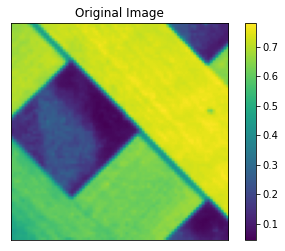

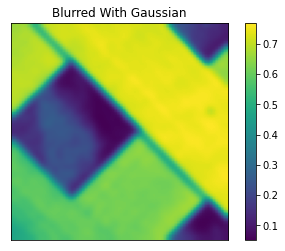

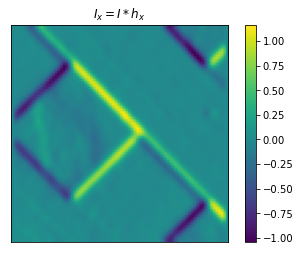

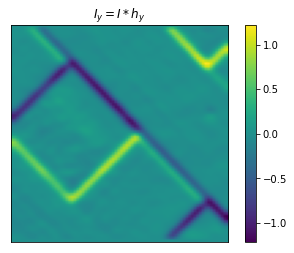

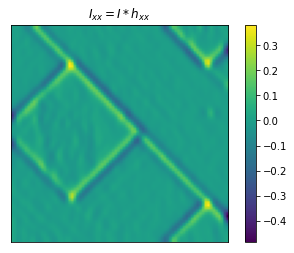

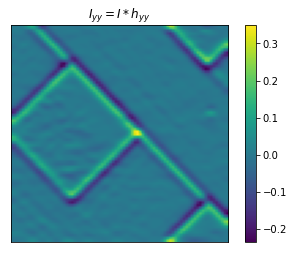

In [68]:
mdict = sio.loadmat("./hw2_data/imgs_for_optical_flow.mat")

def print_img(img, title):
    _ = plt.imshow(img, interpolation=None)
    plt.colorbar()
    plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
img = mdict["img1"]
print_img(img, "Original Image")

blurred_img = cv2.GaussianBlur(img,(5,5),0)
print_img(blurred_img, "Blurred With Gaussian")

hx1, hy0 = cv2.getDerivKernels(1,0,3)
hx0, hy1 = cv2.getDerivKernels(0,1,3)
hx2, _ = cv2.getDerivKernels(2,0,3)
_, hy2 = cv2.getDerivKernels(0,2,3)

res_x1 = cv2.sepFilter2D(blurred_img,-1,hx1,hy0)
print_img(res_x1, "$I_x = I * h_x$")

res_y1 = cv2.sepFilter2D(blurred_img,-1,hx0,hy1)
print_img(res_y1, "$I_y = I * h_y$")

res_x2 = cv2.sepFilter2D(blurred_img,-1,hx2,hy0)
print_img(res_x2, "$I_{xx} = I * h_{xx}$")

res_y2 = cv2.sepFilter2D(blurred_img,-1,hx0,hy2)
print_img(res_y2, "$I_{yy} = I * h_{yy}$")